## CP5 - Modelos de Classificação

- Keven Ike                 - RM 553215
- Lucas Alcântara Carvalho  - RM 95111
- Renan Bezerra da Silva    - RM 553228

Treinamos alguns modelos de classificação diferentes para obter a maior acurácia possível.
E assim, optamos por então finalizar utilizando o **RandomForest**, obtendo acurácia de **96.3235**.

## Instalação e impotação das bibliotecas

In [1]:
!pip install seaborn matplotlib numpy pandas

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as ny

## Leitura do arquivo CSV

In [2]:
df = pd.read_csv("cogumelos_MODIFICADO.csv")

## Remoção da coluna inutil

In [3]:
df = df.drop('coluna completamente inutil (me remova)', axis=1)

## Remoção de dados faltantes

In [4]:
df_sem_nulos_coluna = df.dropna()

## Instalação da Biblioteca SKLearn

In [6]:
!pip install scikit-learn

## Importação da Classe e Função

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Preparação dos dados para iniciar modelagem
X = Contendo todas caracteristicas do Dataframe, com excessão da coluna comestivel.
<br>
y = Variável alvo (comestivel)

In [8]:
X = df_sem_nulos_coluna.drop('comestivel', axis=1)
y = df_sem_nulos_coluna["comestivel"]

## Instância do classificador de árvore de decisão

In [9]:
maquina = DecisionTreeClassifier()

## Treinando com os dados

In [10]:
maquina.fit(X, y)

DecisionTreeClassifier()

## Visualização da estrutura da árvore de decisão

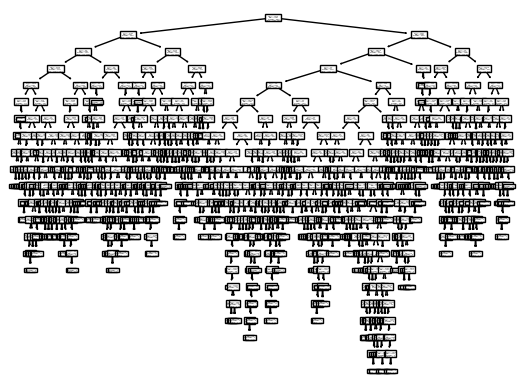

In [11]:
plot_tree(maquina);

## Importação da função de calculo de acurácia

In [12]:
from sklearn.metrics import accuracy_score

## Criação de amostras aleatórias

In [13]:
pac_aleatorio = X.sample(3,random_state=42)
pac_aleatorio

,diâmetro do chapéu,forma do chapéu,fixação das lamelas,cor das lamelas,altura do caule,largura do caule,cor do caule,coluna de origem duvidosa (use por sua conta em risco),estação
25279,1091.0,2.0,6.0,5.0,0.207333,1803.0,14.0,10.431441,0.943195
26577,674.0,6.0,1.0,10.0,1.504906,947.0,2.0,11.783726,0.943195
36081,803.0,7.0,6.0,9.0,1.646876,1932.0,3.0,11.459586,0.943195


## Utilizando para fazer previsões contidas no DataFrame

In [14]:
maquina.predict(pac_aleatorio)

array([0., 1., 1.])

## Obtem as probabilidade previstas das classes para as observações contidas

In [15]:
maquina.predict_proba(pac_aleatorio) 

array([[1., 0.],
       [0., 1.],
       [0., 1.]])

## Separando os conjuntos de dados em treinamento e teste

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.20, random_state=42)

## Calculando acurácia do modelo nos dados de treinamento

In [17]:
accuracy_score(y_train, maquina.predict(X_train))

1.0

## Criação de uma nova classificação de árvore de decisão

In [18]:
maquina_2 = DecisionTreeClassifier()
maquina_2.fit(X_train, y_train)
maquina_2

DecisionTreeClassifier()

## Calculando acurácia do modelo nos dados de treinamento

In [19]:
print(accuracy_score(y_train, maquina_2.predict(X_train)))
print(accuracy_score(y_test, maquina_2.predict(X_test)))

1.0
0.8998868778280543


## Criando novo classificador utilizando RandomForest

In [20]:
from sklearn.ensemble import RandomForestClassifier

floresta = RandomForestClassifier().fit(X_train, y_train)  

In [21]:
y_pred = floresta.predict(X_test)

## Calculando acurácia do modelo RandomForest

Método de classificação escolhido para ter a maior acurácia possível.

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)*100

96.32352941176471

## Criando novo classificador utilizando Gradient Boosting
Para verificarmos se conseguiamos ter uma acurácia melhor

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
#MLP -- treina 

maquina_3 = GradientBoostingClassifier()
maquina_3.fit(X_train, y_train)
maquina_3

GradientBoostingClassifier()

## Calculando acurácia do modelo Gradient Boosting

Acurácia mediana entre todos modelos testados.

In [24]:
print(accuracy_score(y_train, maquina_3.predict(X_train)))
print(accuracy_score(y_test, maquina_3.predict(X_test)))

0.8472202574621587
0.8297511312217195


## Criando novo classificador utilizando Multilayer Perceptron (MLP)
Mais uma verificação se conseguiamos uma maior acurácia

In [25]:
from sklearn.neural_network import MLPClassifier

maquina_4 =  MLPClassifier()
maquina_4.fit(X_train, y_train)
maquina_4

MLPClassifier()

## Calculando acurácia do modelo MLP

Com acurácia menor entre todos os modelos testados.

In [26]:
print(accuracy_score(y_train, maquina_4.predict(X_train)))
print(accuracy_score(y_test, maquina_4.predict(X_test)))

0.6439383222520866
0.6057692307692307
